In [ ]:
# %pip install geopandas pandas sqlalchemy psycopg2-binary openpyxl geoalchemy2 python-dotenv matplotlib

# Import Block

In [ ]:
import geopandas as gpd
from sqlalchemy import create_engine

import os
from dotenv import load_dotenv

# Global Constants

In [ ]:
CBF_SHAPEFILE_PATH = "../../data/canada/lfed000b21a_e.zip"
PATH_TO_DOT_ENV = "../../.env"

DATABASE_TYPE = "postgresql"
DATABASE_HOST = "localhost"

CANADIAN_SUBDIVISON_TABLE_NAME = "S_c"

In [ ]:
load_dotenv(PATH_TO_DOT_ENV)

DATABASE_NAME = os.environ.get("DATABASE_NAME")
POSTGRES_USER = os.environ.get("POSTGRES_USER")
POSTGRES_PASSWORD = os.environ.get("POSTGRES_PASSWORD")
POSTGRES_HOST_PORT = os.environ.get("POSTGRES_HOST_PORT")
POSTGRES_CONTAINER_PORT = os.environ.get("POSTGRES_CONTAINER_PORT")

In [ ]:
engine = create_engine(f"{DATABASE_TYPE}://{POSTGRES_USER}:{POSTGRES_PASSWORD}@{DATABASE_HOST}:{POSTGRES_HOST_PORT}/{DATABASE_NAME}")

# Canadian Boundary Fire to DB

In [ ]:
%%time
# read data
subdivisions_gpd = gpd.read_file(CBF_SHAPEFILE_PATH)
subdivisions_gpd = subdivisions_gpd.to_crs("EPSG:4326")

CPU times: user 31 s, sys: 798 ms, total: 31.8 s
Wall time: 32 s


In [ ]:
# conver datatypes
subdivisions_gpd['FEDUID'] = subdivisions_gpd['FEDUID'].astype(int)
subdivisions_gpd['PRUID'] = subdivisions_gpd['PRUID'].astype(int)

In [ ]:
# set index
subdivisions_gpd.set_index('FEDUID', inplace=True)

In [ ]:
# view data 
subdivisions_gpd.head()

,DGUID,FEDNAME,FEDENAME,FEDFNAME,LANDAREA,PRUID,geometry
FEDUID,,,,,,,
10001,2013A000410001,Avalon,Avalon,Avalon,6357.2457,10,"MULTIPOLYGON (((-53.44465 46.67495, -53.44474 ..."
10002,2013A000410002,Bonavista--Burin--Trinity,Bonavista--Burin--Trinity,Bonavista--Burin--Trinity,16529.4593,10,"MULTIPOLYGON (((-53.77539 48.71901, -53.77552 ..."
10003,2013A000410003,Coast of Bays--Central--Notre Dame,Coast of Bays--Central--Notre Dame,Coast of Bays--Central--Notre Dame,38674.0098,10,"MULTIPOLYGON (((-55.51195 49.45222, -55.51213 ..."
10004,2013A000410004,Labrador,Labrador,Labrador,258539.4032,10,"MULTIPOLYGON (((-55.60642 53.43093, -55.60651 ..."
10005,2013A000410005,Long Range Mountains,Long Range Mountains,Long Range Mountains,37319.1682,10,"MULTIPOLYGON (((-58.32368 49.25135, -58.32372 ..."


In [ ]:
%%time
# send to DB
try:
    subdivisions_gpd.to_postgis(name=CANADIAN_SUBDIVISON_TABLE_NAME, con=engine, if_exists='replace', index=True)  
except Exception as e:
    print(e)


CPU times: user 15.3 s, sys: 1.26 s, total: 16.6 s
Wall time: 24.4 s


CPU times: user 20.7 s, sys: 399 ms, total: 21.1 s
Wall time: 22 s


<Axes: >

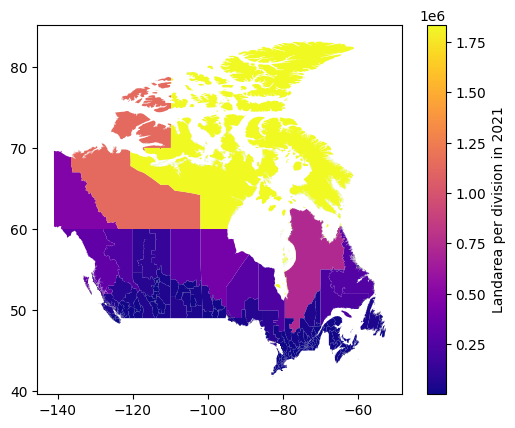

In [ ]:
%%time
# visluze data 
subdivisions_gpd.plot(
    column = "LANDAREA",
    cmap='plasma',
    legend = True,
    legend_kwds={"label": "Landarea per division in 2021", "orientation": "vertical"}
)